In [19]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
start=dt.datetime(2000,1,1)
end=dt.datetime(2019,11,11)

In [20]:
df=web.DataReader('SPY','yahoo',start,end)

In [21]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.470520
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.541473
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,96.714218
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.159882
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,100.686371


In [22]:
df=df.iloc[:,3:4]
df.head()

,Close
Date,
2000-01-03,145.4375
2000-01-04,139.7500
2000-01-05,140.0000
2000-01-06,137.7500
2000-01-07,145.7500


In [23]:
for i in range(10,200):
    df[i]=df['Close'].rolling(window=i).mean()  

In [24]:
df['close1']=df['Close'].shift(-1)

In [25]:
df=df.dropna()

In [26]:
df_corr=df.corr()
df_corr.tail()

,Close,10,11,12,13,14,15,16,17,18,...,191,192,193,194,195,196,197,198,199,close1
196,0.983649,0.985265,0.985430,0.985593,0.985755,0.985915,0.986074,0.986232,0.986388,0.986544,...,0.999989,0.999993,0.999996,0.999998,1.000000,1.000000,1.000000,0.999998,0.999996,0.983402
197,0.983557,0.985175,0.985340,0.985503,0.985665,0.985825,0.985985,0.986143,0.986300,0.986455,...,0.999984,0.999989,0.999993,0.999996,0.999998,1.000000,1.000000,1.000000,0.999998,0.983310
198,0.983465,0.985084,0.985249,0.985413,0.985575,0.985736,0.985895,0.986053,0.986211,0.986366,...,0.999978,0.999984,0.999989,0.999993,0.999996,0.999998,1.000000,1.000000,1.000000,0.983217
199,0.983372,0.984993,0.985159,0.985322,0.985485,0.985645,0.985805,0.985964,0.986121,0.986277,...,0.999971,0.999978,0.999984,0.999989,0.999993,0.999996,0.999998,1.000000,1.000000,0.983125
close1,0.999611,0.998762,0.998669,0.998577,0.998484,0.998389,0.998296,0.998205,0.998115,0.998024,...,0.983859,0.983768,0.983677,0.983585,0.983494,0.983402,0.983310,0.983217,0.983125,1.000000


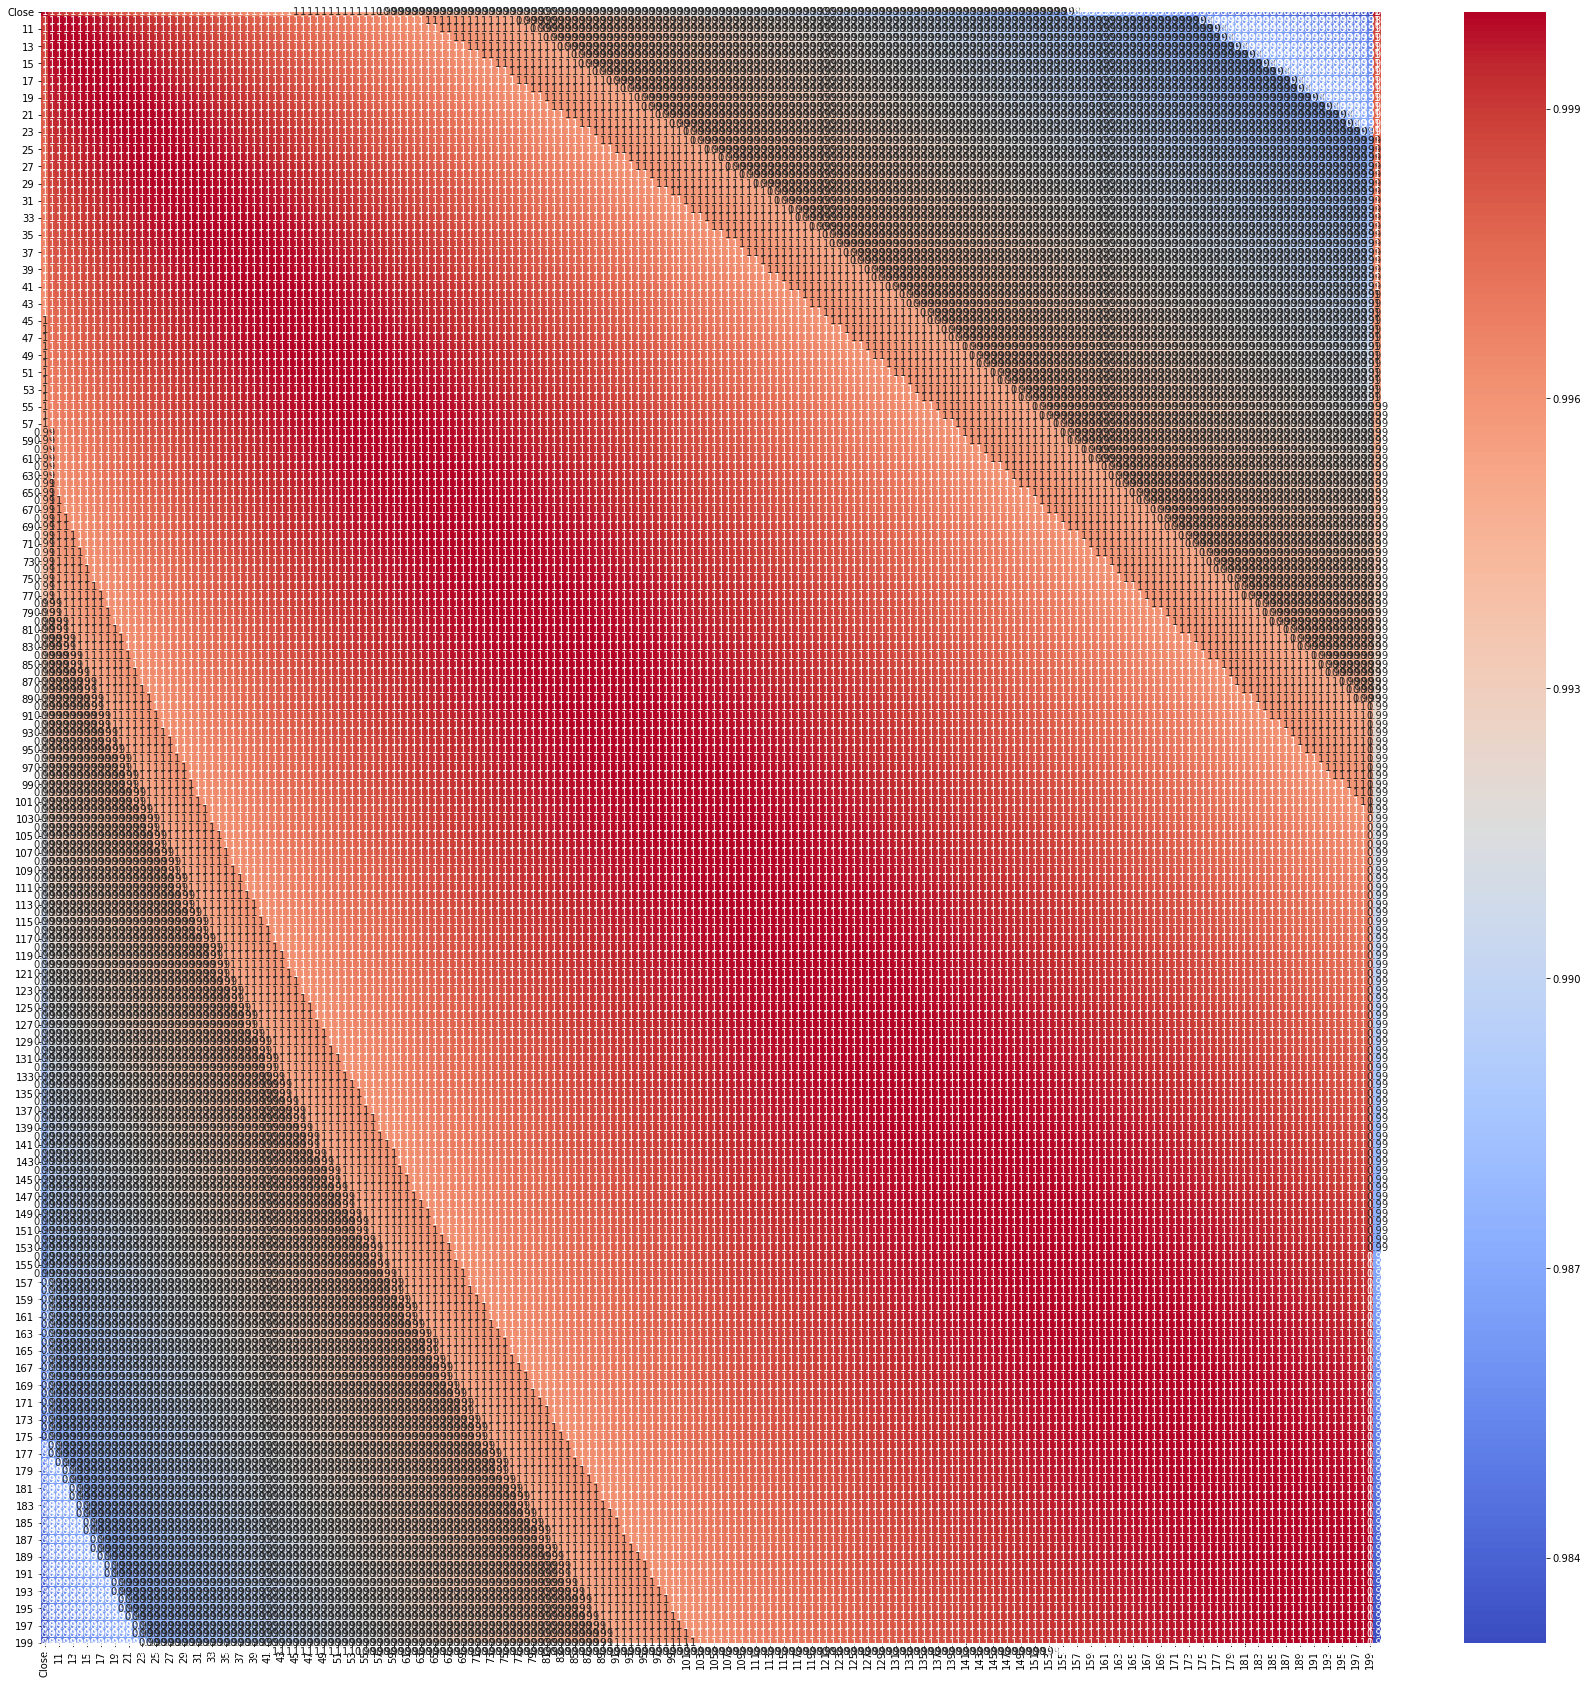

In [27]:
import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sea.heatmap(df_corr,annot=True, cmap='coolwarm')